# Generation and Demand Time Series

In [1]:
import io
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
import pandas as pd

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario

The function below plot the time series of the power generated per fuel type for a given scenario along with the associated data.

In [2]:
def do_stack_analysis(data, time, zones):
    f = io.StringIO()
    with redirect_stdout(f):
        stack = apg(data, time, zones,
                    ["coal", "dfo", "geothermal", "hydro", "ng", "nuclear", "other", "solar", "wind", "wind_offshore"],
                    'stacked', normalize=False)
    stack.get_plot(save=False)
    data_stack = stack.get_data()
    print("Total Generation in MWh:")
    for z in zones:
        print("%s: %d" % (z, data_stack[z].sum().sum()))

## Scenario
Here, we consider our *2020 base scenario*. This is the scenario presented in the scrolly telling on our webpage: https://science.breakthroughenergy.org/.

In [3]:
scenario = Scenario("824")

SCENARIO: Julia | USABase_2020_Anchor_profile_fix_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


Plot time series

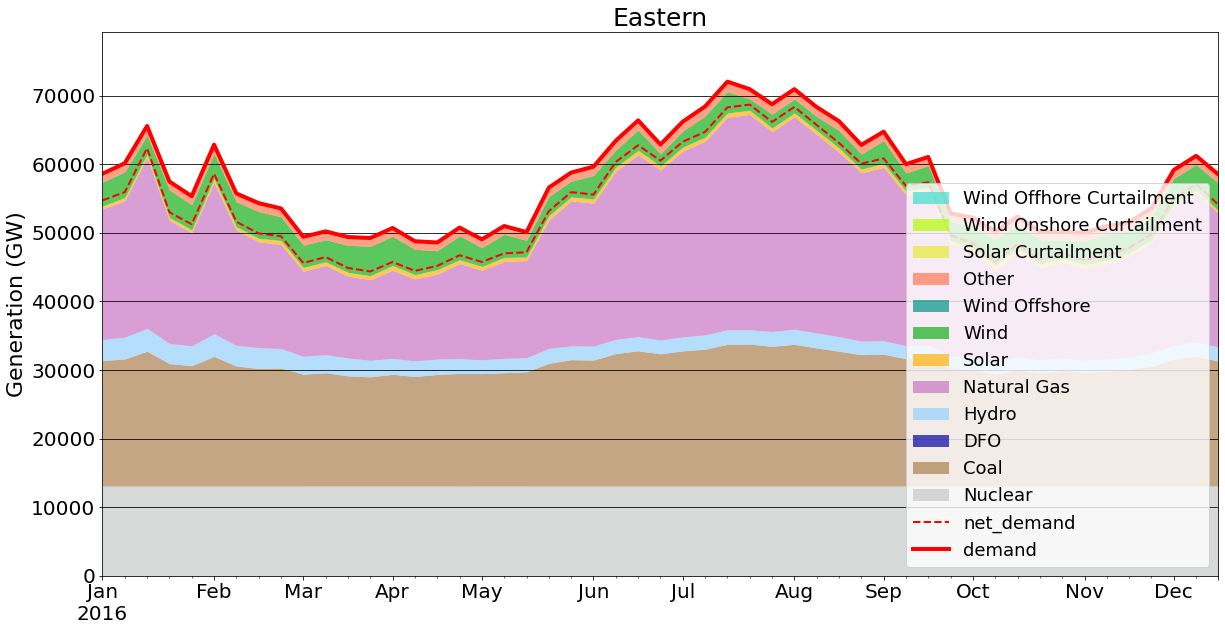

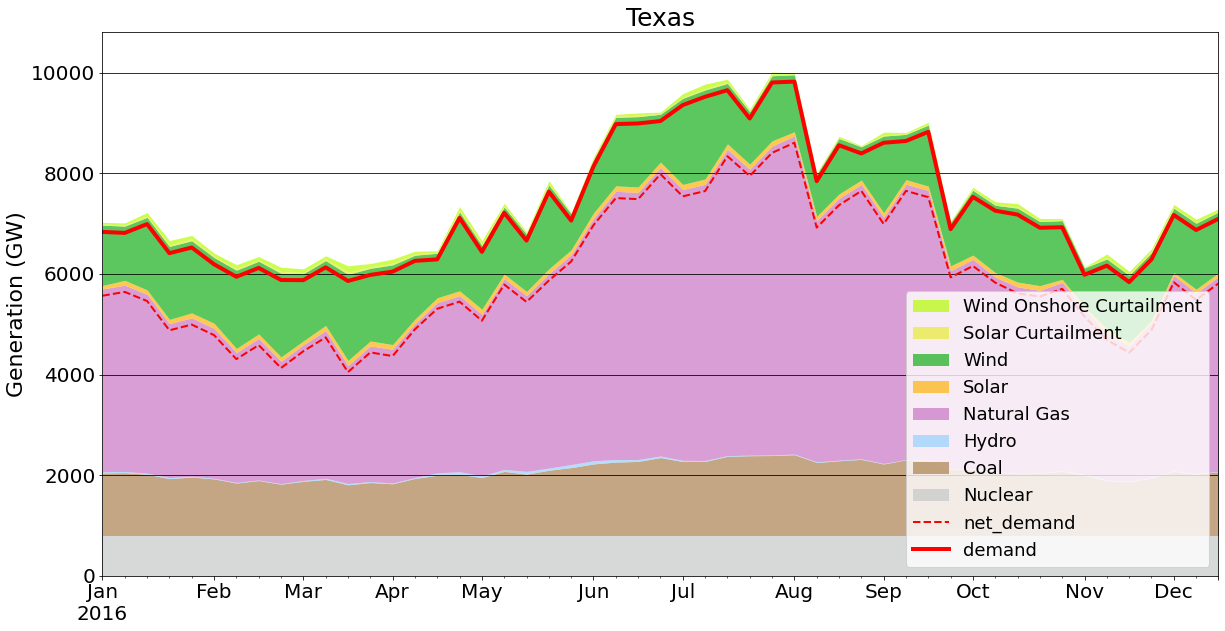

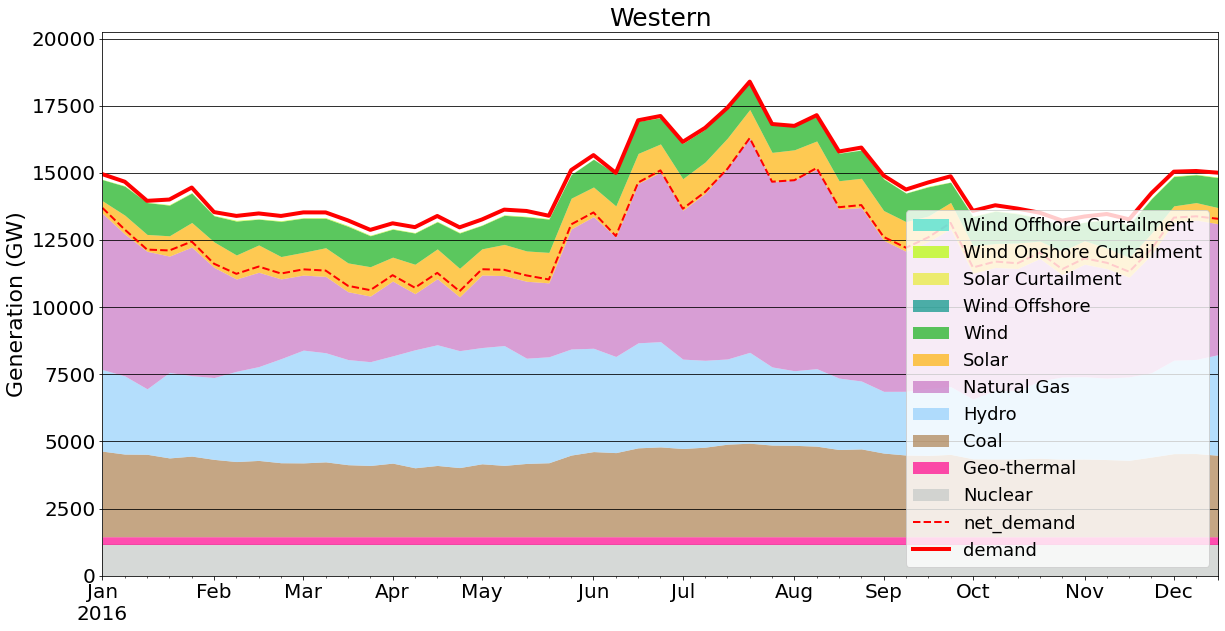

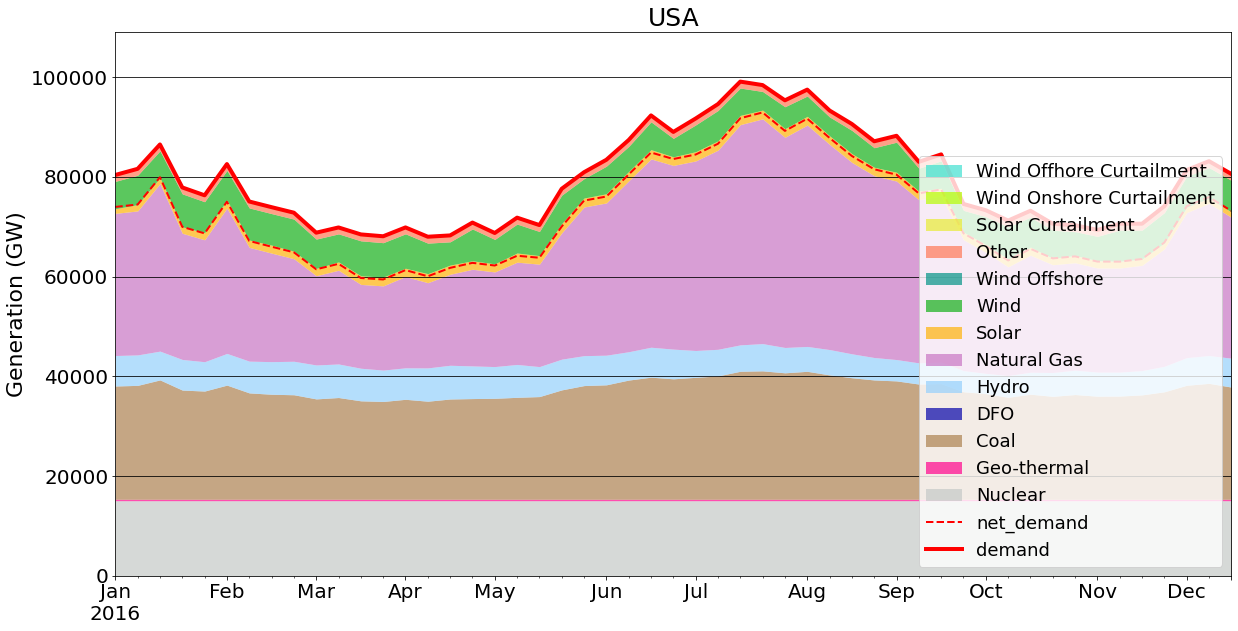

Total Generation in MWh:
Eastern: 5868931
Texas: 757713
Western: 1477560
USA: 8104205


In [4]:
time = ('2016-01-01-00', '2016-12-31-23', 'utc', 'W')
do_stack_analysis(scenario, time, ["Eastern", "Texas", "Western", "USA"])